# Raíces de ecuaciones

Los planetas al girar alrededor del sol se mueven en órbitas elípticas no uniformes. Su movimiento cumple las leyes de Kepler, de las cuales la segunda ley específica que el momento angular es constante. 

La ecuación de Kepler para el movimiento planetario es
$$M=E-\varepsilon\sin E,$$
donde $M$ es la anomalía media, $\varepsilon$ es la excentricidad de la elipse y $E$ es la anomalía excéntrica. Puede ser de interés resolver la ecuación para encontrar la anomalía excéntrica ($E$) para lo cual nos encontramos ante una ecuación no lineal muy difícil de resolver mediante métodos algebraicos. 

Observemos en la siguiente imagen el movimiento que describe un objeto celeste al trasladarse en el cielo. Para conocer con exactitud estos movimientos debemos ser capaces de resolver ecuaciones como la de Kepler.

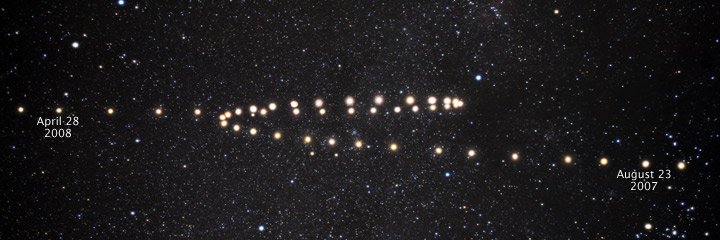

En esta sección estudiaremos tres métodos que nos permiten resolver ecuaciones no lineales de forma numérica. Varios fenómenos pueden ser descritos mediante el uso de ecuaciones o sistemas de ecuaciones no lineales, es muy importante entonces conocer formas de hallar soluciones de forma eficiente.

Resolveremos la ecuación de Kepler para encontrar $E$ en el siguiente ejemplo:
Considere un satélite en una órbita geocéntrica con una exentricidad $\varepsilon = 0.37255$. Determine la anomalía exéntrica a las tres horas después del perigeo, calcule la posición del satélite.

A partir de las observaciones se tiene que la anomalía media es $M=3.6029$, de donde obtenemos la siguiente ecuación: $$E=3.6029+0.37255\sin E,$$
esta ecuación no se puede resolver mediante métodos algebraicos tradicionales. Por lo cual aplicaremos los métodos iterativos de solución de búsqueda de raíces.

## Método de la bisección


In [4]:
import numpy as np

def biseccion(f,a,b,tol,nmax):
    for i in range(1,nmax):
        if np.sign(f(a)) == np.sign(f(b)):
            print("La raíz no está en el intervalo especificado")
            return
        
        m = (a + b)/2
        
        if abs(f(m)) < tol:
            return m
        elif np.sign(f(a)) == np.sign(f(m)):
            a = m
        #elif np.sign(f(b)) == np.sign(f(m)):
        else:
            b = m
        i += i

In [5]:
def biseccion2(f,a,b,tol): 
    if np.sign(f(a)) == np.sign(f(b)):
        print("La raíz no está en el intervalo especificado")
        return
        
    m = (a + b)/2
    
    if np.abs(f(m)) < tol:
        return m
    elif np.sign(f(a)) == np.sign(f(m)):
        return biseccion2(f, m, b, tol)
    elif np.sign(f(b)) == np.sign(f(m)):
        return biseccion2(f, a, m, tol)

In [7]:
f = lambda x: x**2 - 2

r1 = biseccion(f, 1, 2, 0.0001,100)
r2 = biseccion2(f, 1, 2, 0.0001)
print("error =", np.sqrt(2)-r1)
print("error =", np.sqrt(2)-r2)

error = 2.8992060595145475e-05
error = 2.8992060595145475e-05


## Método de Newton

Para la iteración

$$x_{n+1}=x_n-\frac{f(x_n)}{f'(n_n)}$$

Tomemos $f(x)=x^3-x^2-1$, entonces $f'(x)=3x^2-2x$

In [4]:
def newton(f,df,x0,nmax,tol):
    xi=x0
    for i in range(0,nmax):
        xi=xi-f(xi)/df(xi)
        if abs(f(xi)) < tol:
            print(xi,' encontrado con ',i,' iteraciones')
            break
    return None

In [5]:
f = lambda x: x**3 - x**2 - 1
df = lambda x: 3*x**2 - 2*x

In [6]:
newton(f,df,1,20,1e-10)

1.4655712318767877  encontrado con  5  iteraciones


## Regula falsi

In [7]:
def regulafalsi(f,x0,x1,nmax,tol):
    for i in range(0,nmax):
        x2=(x0*f(x1)-x1*f(x0))/(f(x1)-f(x0));
        if abs(x2-x1) < tol:
            print(x2,' encontrado con ',i,' iteraciones')
            break
        else:
            if f(x0)*f(x2) < 0:
                x1=x2
            else:
                x0=x2
    return None

In [8]:
regulafalsi(f,1,2,900,1e-10)

## Método de la secante

In [9]:
def secante(f,x0,x1,nmax,tol):
    for i in range(0,nmax):
        x2=(x0*f(x1)-x1*f(x0))/(f(x1)-f(x0));
        if abs(x2-x1) < tol:
            print(x2,' encontrado con ',i,' iteraciones')
            break
        else:
            x0=x1
            x1=x2
    return None

In [10]:
secante(f,1,2,20,1e-10)

1.4655712318767682  encontrado con  7  iteraciones
